<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Notebook Imports
<a class="anchor" id="1"></a> 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Importing data
<a class="anchor" id="2"></a> 

In [16]:
df = pd.read_csv('Desktop/New folder/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

-  There are no missing values in this dataset

In [23]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Mean maths score is lowest among the different type of scores.
- Half of the students have marks greater than or equal to 70 in reading exam

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Feature Engineering
<a class="anchor" id="3"></a> 

- We can derive the following 2 features in this dataset using the different types of scores.
   - **Percentage**
   - **Grade**

In [26]:
df['Percentage'] = round((df['reading score'] + df['writing score'] + df['math score']) / 3, 2)

In [27]:
def Grade(percentage):
    if percentage >= 95: return "O"
    if percentage > 81 : return "A"
    if percentage > 71 : return "B"
    if percentage > 61 : return "C"
    if percentage > 51 : return "D"
    if percentage > 41 : return "E"
    else: return "F"

df["Grade"] = df['Percentage'].apply(lambda x: Grade(x))

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,B
1,female,group C,some college,standard,completed,69,90,88,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,E
4,male,group C,some college,standard,none,76,78,75,76.33,B


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Exploratory Data Analysis
<a class="anchor" id="4"></a> 

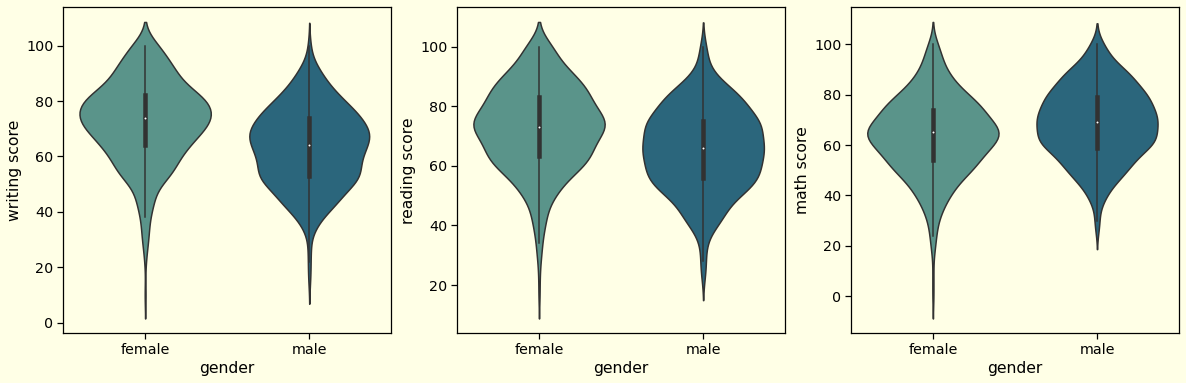

In [30]:
sns.set_context('notebook', font_scale= 1.3)
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"
fig, ax = plt.subplots(1, 3, figsize = (20, 6))
ax1 = sns.violinplot(x = df['gender'], y = df['writing score'], palette= 'crest', ax= ax[0])
ax1 = sns.violinplot(x = df['gender'], y = df['reading score'], palette= 'crest', ax= ax[1])
ax1 = sns.violinplot(x = df['gender'], y = df['math score'], palette= 'crest', ax= ax[2])

- Females tend to do better than males in both reading and writing
- Males perform better in Maths

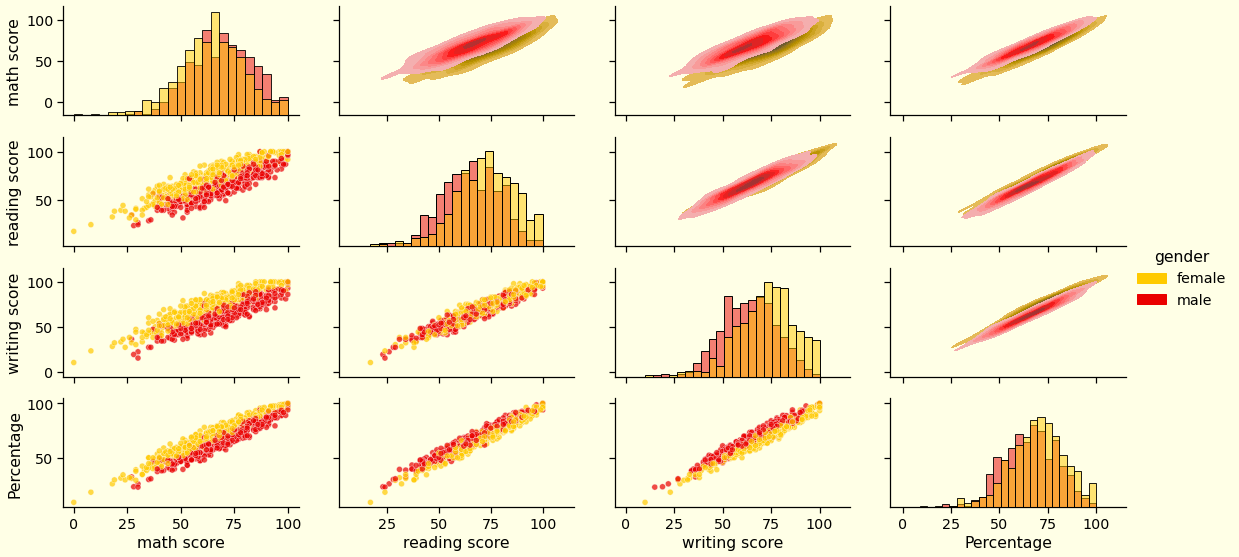

In [34]:
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"

grid = sns.PairGrid(df, vars=['math score', 'reading score', 'writing score', 'Percentage'], hue= 'gender', palette= 'hot_r',
                    height=2, aspect = 2)

grid = grid.map_diag(sns.histplot)
grid = grid.map_lower(sns.scatterplot, alpha =  0.7)
grid = grid.map_upper(sns.kdeplot, n_levels = 10, shade = True)

grid.add_legend()
plt.show()

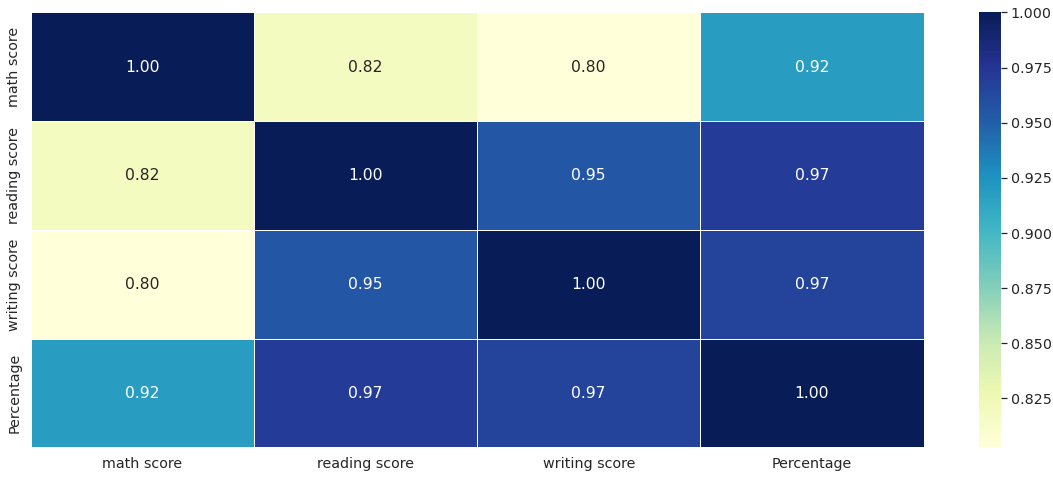

In [35]:
with sns.axes_style('white'):
    plt.figure(figsize= (20, 8))
    sns.heatmap(df.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu")

- Almost all of these scores are highly correlated with each other
- Maths score seems to be the least correlated among these, therefore we will try to predict maths score during modelling

In [37]:
ethnicity = df['race/ethnicity'].value_counts()
fig = px.pie(values = ethnicity.values,
             names = ethnicity.index,
             color_discrete_sequence = px.colors.sequential.Sunset,
             title = "Race/Ethnicity distribution",
             hole = 0.8)
 
fig.update_traces(textinfo = 'label+percent', textfont_size=18)

fig.update_layout(
    font = dict(size = 20, family = "arial"),
    annotations = [dict(text = 'Race', x = 0.5, y = 0.5, font_size = 30, showarrow=False)]
)
fig.show()

In [42]:
ethnicity = df['gender'].value_counts()
fig = px.pie(values = ethnicity.values,
             names = ethnicity.index,
             color_discrete_sequence = px.colors.sequential.Sunset,
             title = "Gender distribution",
             hole = 0.8)
 
fig.update_traces(textinfo = 'label+percent', textfont_size=18)

fig.update_layout(
    font = dict(size = 20, family = "arial"),
    annotations = [dict(text = 'Gender', x = 0.5, y = 0.5, font_size = 30, showarrow=False)]
)
fig.show()

In [45]:
ethnicity = df['lunch'].value_counts()
fig = px.pie(values = ethnicity.values,
             names = ethnicity.index,
             color_discrete_sequence = px.colors.sequential.Sunset,
             title = "Lunch distribution",
             hole = 0.8)
 
fig.update_traces(textinfo = 'label+percent', textfont_size=18)

fig.update_layout(
    font = dict(size = 30, family = "arial"),
    annotations = [dict(text = 'Lunch', x = 0.5, y = 0.5, font_size = 50, showarrow=False)]
)
fig.show()

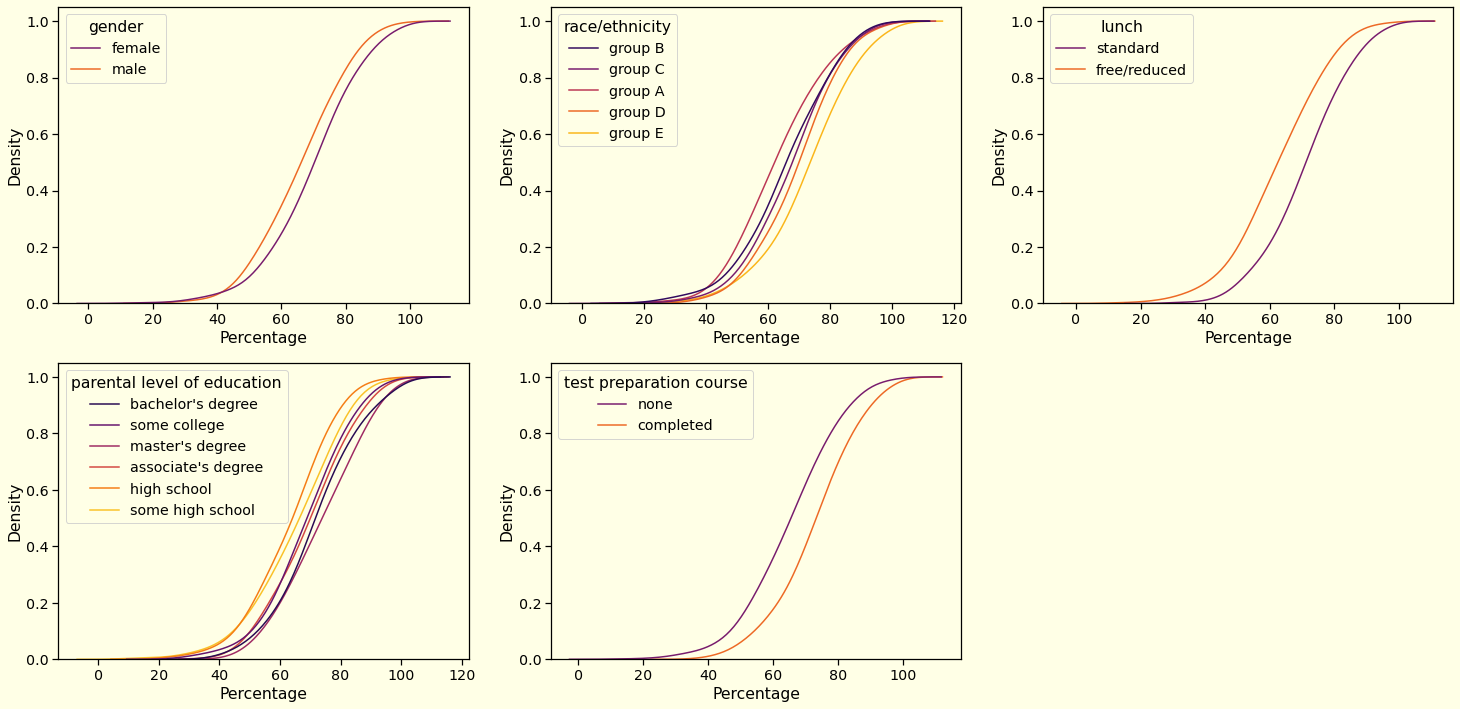

In [54]:
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"

fig, ax = plt.subplots(2, 3, figsize = (25, 12))
ax[1, 2].axis('off')

sns.kdeplot(data = df, x = "Percentage", hue = "gender", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[0, 0])
sns.kdeplot(data = df, x = "Percentage", hue = "race/ethnicity", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[0, 1])
sns.kdeplot(data = df, x = "Percentage", hue = "lunch", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[0, 2])
sns.kdeplot(data = df, x = "Percentage", hue = "parental level of education", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[1, 0])
sns.kdeplot(data = df, x = "Percentage", hue = "test preparation course", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[1, 1])

plt.show()

- Females have higher percentage than males
- Students whose parents holds a master's degree have a higher percentage than others
- Students who completed their course have higher percentage as compared to those who didn't.

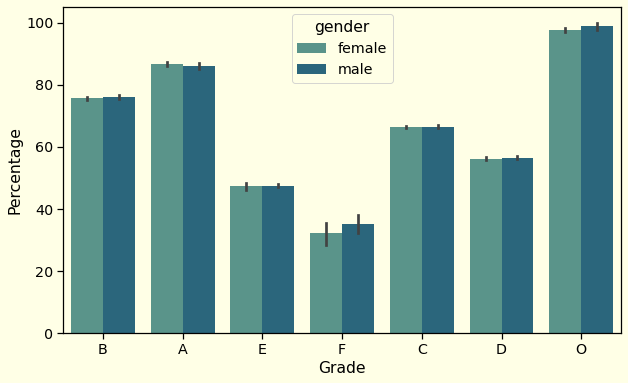

In [55]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Grade', y = 'Percentage', data= df, hue= 'gender', palette= 'crest');

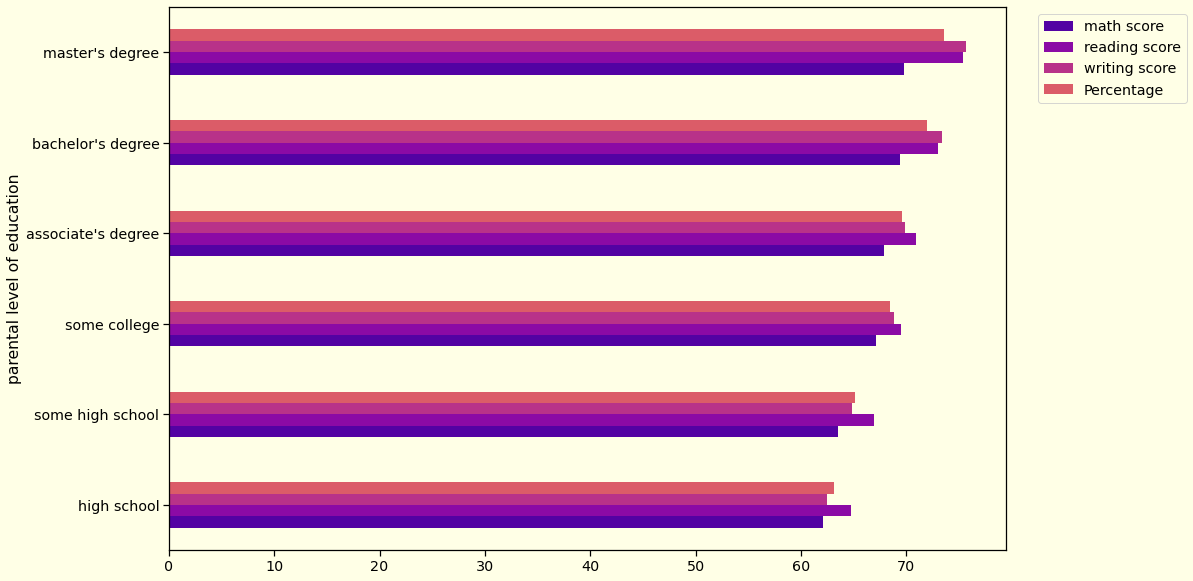

In [56]:
sns.set_palette("plasma")
df.groupby('parental level of education').agg('mean').sort_values(by = 'Percentage').plot(kind='barh',figsize=(15,10))
plt.legend(bbox_to_anchor=(1.03, 1), loc = 2);

- Students whose parents never went to college seems to have the lowest percentage
- Students whose parents have a master's degree performed the best followed by parents having a bachelor's degree

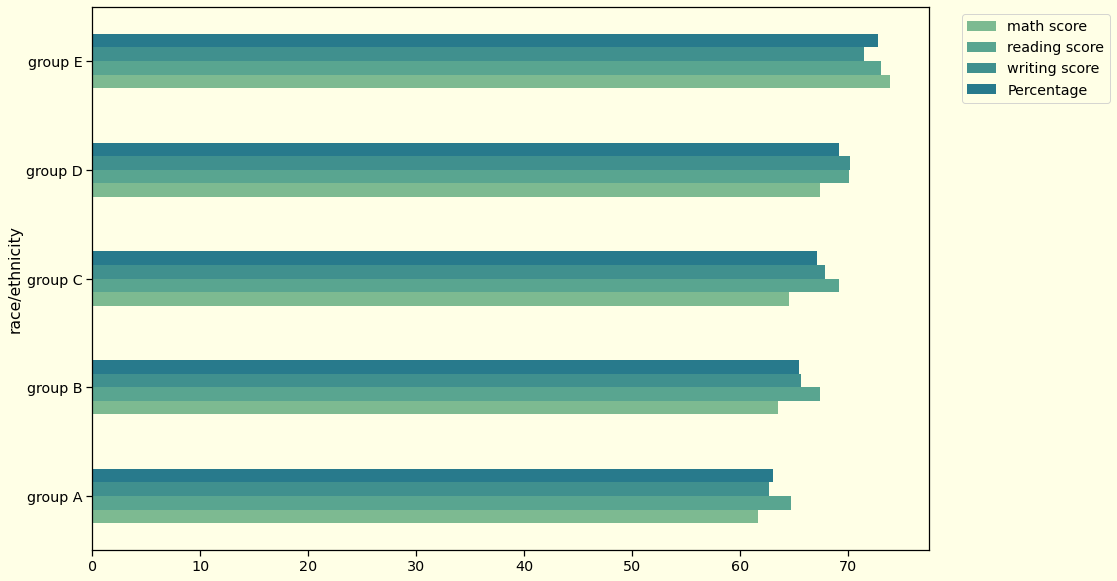

In [58]:
sns.set_palette("crest")
df.groupby('race/ethnicity').agg('mean').sort_values(by = 'Percentage').plot(kind='barh',figsize=(15,10))
plt.legend(bbox_to_anchor=(1.03, 1), loc = 2);

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Transformation Pipeline
<a class="anchor" id="5"></a> 

In [63]:
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, grades_ordering = ['F', 'E', 'D', 'C', 'B', 'A', 'O'],
                 ethnicity_ordering = ['group A', 'group B', 'group C', 'group D', 'group E'],
                 parents_education_ordering = ['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]):
                 
        self.grades_ordering = grades_ordering
        self.ethnicity_ordering = ethnicity_ordering
        self.parents_education_ordering = parents_education_ordering
    
    def fit(self, X, y=None):
        return self  

    def transform(self, X):
        X["Grade"] = X['Grade'].apply(lambda x: self.grades_ordering.index(x))
        X["parental level of education"] = X['parental level of education'].apply(lambda x: self.parents_education_ordering.index(x))
        X["race/ethnicity"] = X['race/ethnicity'].apply(lambda x: self.ethnicity_ordering.index(x))
        return X

In [64]:
num_cols = ['reading score', 'writing score', 'Percentage']
cat_cols = ['gender', 'lunch', 'test preparation course']
ordinal_cols = ['Grade', 'race/ethnicity', 'parental level of education']

In [65]:
pipeline = ColumnTransformer([
    ('std_scaler', StandardScaler(), num_cols),
    ('ord_encode', CustomOrdinalEncoder(), ordinal_cols),
    ('label_encode', OneHotEncoder(), cat_cols)], remainder= 'passthrough')

In [66]:
X = df.drop('math score', axis = 1)
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [67]:
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Random Forest
<a class="anchor" id="6"></a> 

In [68]:
model = RandomForestRegressor(random_state = 42)
model.fit(X_train_prepared, y_train)

kfold = KFold(n_splits= 5)
scores =  - cross_val_score(model, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=kfold)
rmse_scores = np.sqrt(scores)

print(f"Mean: {rmse_scores.mean()}", )
print(f"Standard deviation: {rmse_scores.std()}")

Mean: 3.1028302689588996
Standard deviation: 0.2394257651808727


In [69]:
y_pred = model.predict(X_test_prepared)
rmse = mean_squared_error(y_test, y_pred, squared= False)
r_square = r2_score(y_test, y_pred)

In [70]:
print(f'Root Mean Squared error: {round(rmse, 3)}')
print(f'R-square: {round(r_square, 3)}')

Root Mean Squared error: 2.975
R-square: 0.964


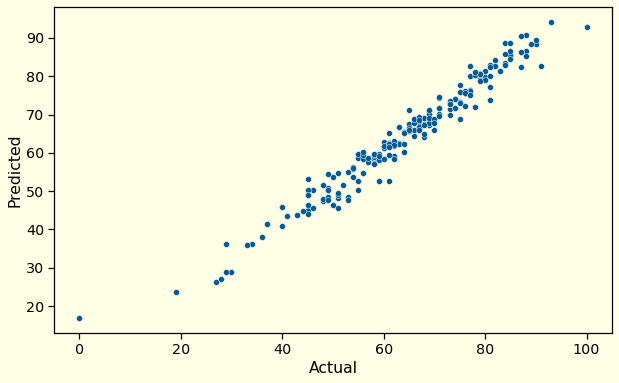

In [71]:
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= y_pred, color= '#005b96')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Hyperparameter Optimization
<a class="anchor" id="7"></a> 

### **GridSearchCV**

In [77]:
params = [
    {'n_estimators': [100, 250, 400], 'max_features': [8, 16, 24]},
    {'bootstrap': [False], 'n_estimators': [200, 400], 'max_features': [15, 30]},
  ]

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, params, cv = kfold,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [8, 16, 24],
                          'n_estimators': [100, 250, 400]},
                         {'bootstrap': [False], 'max_features': [15, 30],
                          'n_estimators': [200, 400]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
mean_rmse_grid_search = np.sqrt( - grid_search.best_score_)
print(f'RMSE: {round(mean_rmse_grid_search, 2)}')

RMSE: 3.18


### **RandomizedSearchCV**

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
        'n_estimators': randint(low= 200, high=500),
        'max_features': randint(low=10, high=50),
    }

model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(model, params,
                                   n_iter = 10, cv = kfold, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1394AC10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x139440A0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [80]:
mean_rmse_random_search = np.sqrt( - random_search.best_score_)
print(f'RMSE: {round(mean_rmse_random_search, 2)}')

RMSE: 3.09


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
THANK YOU VERY MUCH
<a class="anchor" id="2"></a> 